In [1]:
'''
The purpose of this notebook is to do exploratory analysis of the spotify hits data and determine what is popular.
As well as see what kind of trends there are over time in Spotify's top songs.
'''

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sqlite3

In [2]:
database_file_path = '../data/raw_spotify_charts_data.db'
data_table = 'spotify_hits_2017_to_2021'

conn = sqlite3.connect(database_file_path)
pd.read_sql_query(f'SELECT * FROM {data_table} LIMIT 10;', conn)

,date,artist,country,chart,trend,streams
0,2017-01-01T00:00:00,Shakira,Argentina,top200,SAME_POSITION,253019
1,2017-01-01T00:00:00,Ricky Martin,Argentina,top200,MOVE_UP,223988
2,2017-01-01T00:00:00,CNCO,Argentina,top200,MOVE_DOWN,210943
3,2017-01-01T00:00:00,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,top200,SAME_POSITION,173865
4,2017-01-01T00:00:00,Daddy Yankee,Argentina,top200,MOVE_UP,153956
5,2017-01-01T00:00:00,Sebastian Yatra,Argentina,top200,MOVE_DOWN,151140
6,2017-01-01T00:00:00,Rombai,Argentina,top200,MOVE_DOWN,148369
7,2017-01-01T00:00:00,Zion & Lennox,Argentina,top200,MOVE_DOWN,143004
8,2017-01-01T00:00:00,"Carlos Vives, Shakira",Argentina,top200,MOVE_UP,126389
9,2017-01-01T00:00:00,Ozuna,Argentina,top200,MOVE_DOWN,112012


In [3]:
# Taking the data from the region column and the amount of times each region

countries = pd.read_sql_query(f'SELECT country, count(*) AS total_songs  FROM {data_table} GROUP BY country;', conn)
countries.head()

,country,total_songs
0,Andorra,79592
1,Argentina,455308
2,Australia,453103
3,Austria,454593
4,Belgium,449319


c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


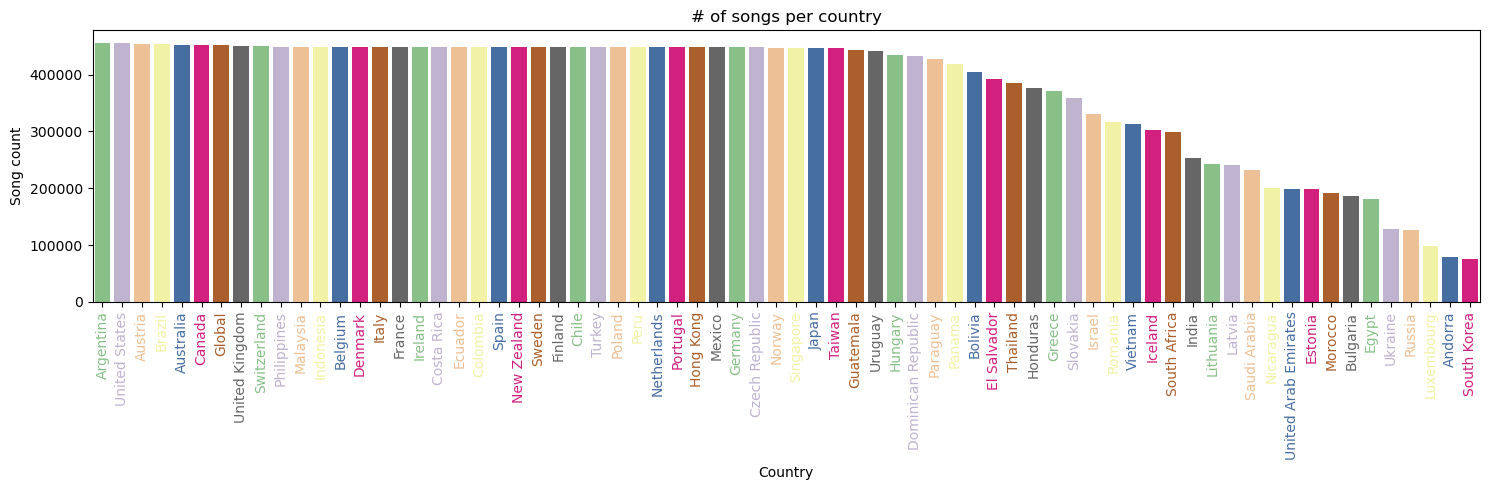

In [4]:
fig, ax = plt.subplots(figsize = (15, 5))
bars = sns.barplot(
    data = countries.sort_values(by = 'total_songs', ascending = False), 
    x = 'country', 
    y = 'total_songs', 
    ax = ax,
    palette = 'Accent'
)
ax.set_title('# of songs per country')
ax.set_xlabel('Country')
ax.set_ylabel('Song count')
ax.tick_params(axis = 'x', labelrotation = 90)
[label.set_color(bar.get_facecolor()) for bar, label in zip(bars.patches, ax.get_xticklabels())]
plt.tight_layout()
plt.show()
fig.savefig('../reports/figures/number-of-songs-per-country.png')

It looks like most countries with fewer songs are in the middle east, Africa and some asian countries.
I did not expect to see Argentina or Austria so high up in the list.
It would be interesting to see data according to what language is used in each song, as I know that a 
lot of artists from countries where the offical language is not english make music in english.

In [6]:
pd.read_sql_query(f'SELECT * FROM {data_table} LIMIT 10', conn)

,date,artist,country,chart,trend,streams
0,2017-01-01T00:00:00,Shakira,Argentina,top200,SAME_POSITION,253019
1,2017-01-01T00:00:00,Ricky Martin,Argentina,top200,MOVE_UP,223988
2,2017-01-01T00:00:00,CNCO,Argentina,top200,MOVE_DOWN,210943
3,2017-01-01T00:00:00,"J Balvin, Pharrell Williams, BIA, Sky",Argentina,top200,SAME_POSITION,173865
4,2017-01-01T00:00:00,Daddy Yankee,Argentina,top200,MOVE_UP,153956
5,2017-01-01T00:00:00,Sebastian Yatra,Argentina,top200,MOVE_DOWN,151140
6,2017-01-01T00:00:00,Rombai,Argentina,top200,MOVE_DOWN,148369
7,2017-01-01T00:00:00,Zion & Lennox,Argentina,top200,MOVE_DOWN,143004
8,2017-01-01T00:00:00,"Carlos Vives, Shakira",Argentina,top200,MOVE_UP,126389
9,2017-01-01T00:00:00,Ozuna,Argentina,top200,MOVE_DOWN,112012


Compare list:
artists TO streams
countries TO streams
countries TO chart
songs in countries TO dates

In [10]:
artists_sum_streams_num_songs = pd.read_sql_query(f'SELECT SUM(streams) as total_streams, count(*) AS num_songs FROM {data_table} GROUP BY artist;', conn)
filtered_artists_data = artists_sum_streams_num_songs[artists_sum_streams_num_songs['total_streams'] != 0]

In [19]:
filtered_artists_data.dtypes

total_streams    int64
num_songs        int64
dtype: object

c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


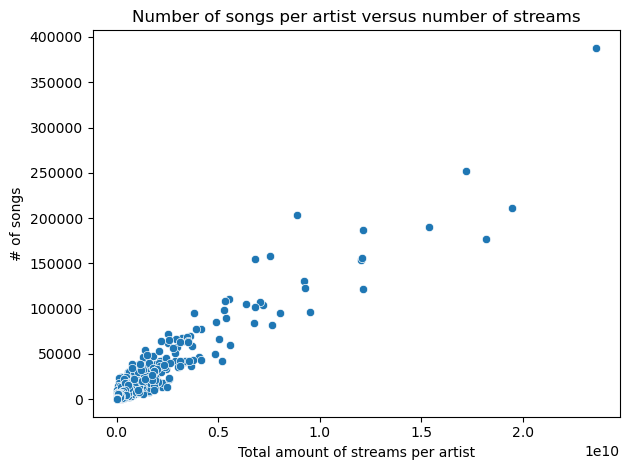

In [15]:
fig_1, ax_1 = plt.subplots()
sns.scatterplot(data = filtered_artists_data, x = 'total_streams', y = 'num_songs', ax = ax_1)
ax_1.set_title('Number of songs per artist versus number of streams')
ax_1.set_ylabel('# of songs')
ax_1.set_xlabel('Total amount of streams per artist')
plt.tight_layout()
plt.show()
fig_1.savefig('../reports/figures/number-of-songs-per-artist-and-number-of-streams.png')

In [21]:
countries_streams_over_time = pd.read_sql_query(f'SELECT SUM(streams) AS total_streams, date, country FROM {data_table} GROUP BY date, country', conn)
countries_songs_over_time = pd.read_sql_query(f'SELECT COUNT(*) AS total_songs, date, country FROM {data_table} GROUP BY date, country', conn)
print(countries_songs_over_time.head())
countries_streams_over_time.head()

   total_songs                 date    country
0           25  2017-01-01T00:00:00    Andorra
1          250  2017-01-01T00:00:00  Argentina
2          250  2017-01-01T00:00:00  Australia
3          250  2017-01-01T00:00:00    Austria
4          250  2017-01-01T00:00:00    Belgium


,total_streams,date,country
0,0,2017-01-01T00:00:00,Andorra
1,7888872,2017-01-01T00:00:00,Argentina
2,5377778,2017-01-01T00:00:00,Australia
3,619064,2017-01-01T00:00:00,Austria
4,960050,2017-01-01T00:00:00,Belgium


In [22]:
countries_songs_over_time['date'] = pd.to_datetime(countries_songs_over_time['date'])
countries_songs_over_time['date'] = countries_songs_over_time['date'].dt.strftime('%m-%d-%Y')

countries_streams_over_time['date'] = pd.to_datetime(countries_streams_over_time['date'])
countries_streams_over_time['date'] = countries_streams_over_time['date'].dt.strftime('%m-%d-%Y')

c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\OMEN\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

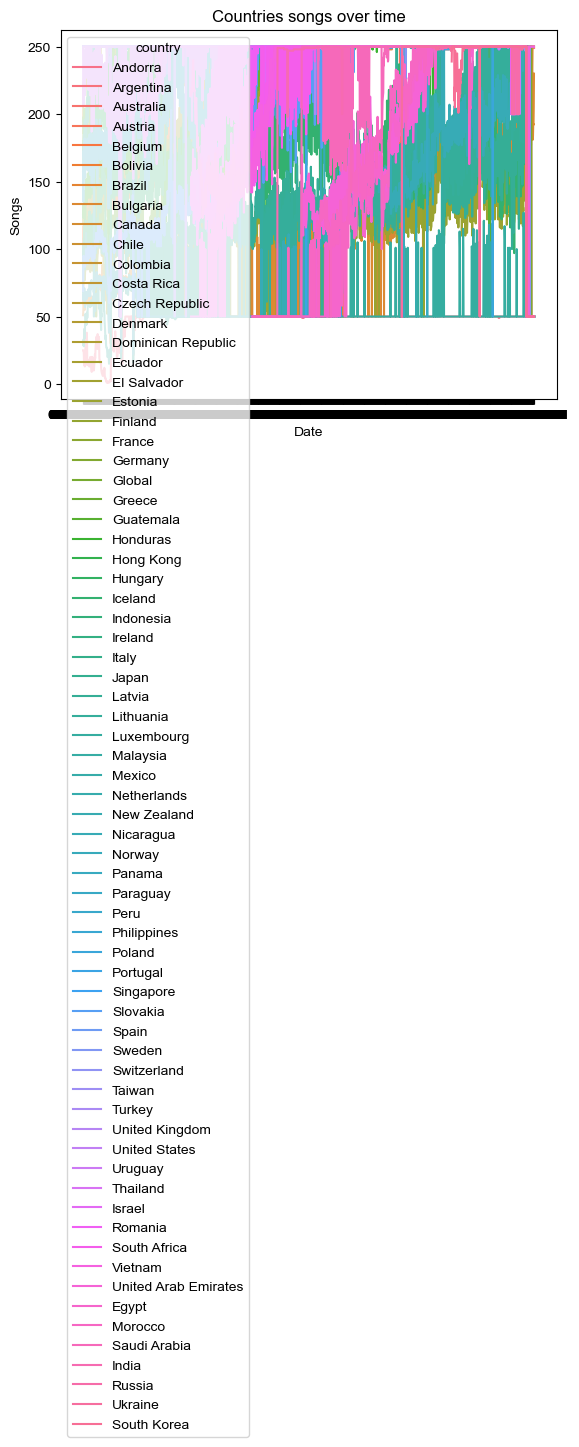

In [24]:
fit_2, ax_2 = plt.subplots()
sns.lineplot(data = countries_songs_over_time, x = 'date', y = 'total_songs', hue = 'country')
sns.set(rc={"figure.figsize":(15, 15)})
ax_2.set_title('Countries songs over time')
ax_2.set_xlabel('Date')
ax_2.set_ylabel('Songs')
plt.tight_layout()
plt.show()
fig.savefig('../reports/figures/countries-songs-over-time.png')